In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

__Objetivo__: *A resposta deve conter os valores da média, mediana, moda e desvio padrão da pontuação de crédito para cada estado do dataset*

__Descrição dos dados__: <br>
*`id`: Identificador do cliente <br>
`sobrenome`: Sobrenome do cliente <br>
`pontuacao_credito`: Pontuação de crédito do cliente (quanto maior, melhor o cliente geralmente) <br>`estado_residencia`: Estado de residência do cliente <br>
`genero`: Gênero do cliente <br>
`nivel_estabilidade`: Nível de estabilidade do cliente <br>
`saldo_conta`: Saldo disponível na conta do cliente <br>
`numero_produtos`: Número de produtos que o cliente consome <br>
`possui_cartao_de_credito`: Possui um cartão de crédito cadastrado <br>
`membro_ativo`: Membro acessa e consome frequentemente<br>*

In [2]:
df = pd.read_csv("desafio1.csv", index_col = 0)
df.head()

,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
RowNumber,,,,,,,,,,,
1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


## *Análise Exploratória*

In [3]:
# verificando se há valores NaN
df.isna().sum()

id                          0
sobrenome                   0
pontuacao_credito           0
estado_residencia           0
genero                      0
idade                       0
nivel_estabilidade          0
saldo_conta                 0
numero_produtos             0
possui_cartao_de_credito    0
membro_ativo                0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 1 to 7000
Data columns (total 11 columns):
id                          7000 non-null object
sobrenome                   7000 non-null object
pontuacao_credito           7000 non-null int64
estado_residencia           7000 non-null object
genero                      7000 non-null object
idade                       7000 non-null int64
nivel_estabilidade          7000 non-null int64
saldo_conta                 7000 non-null float64
numero_produtos             7000 non-null int64
possui_cartao_de_credito    7000 non-null int64
membro_ativo                7000 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 656.2+ KB


In [5]:
df.describe()

,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


In [6]:
# número total por gênero
df.genero.value_counts()

M    3791
F    3209
Name: genero, dtype: int64

In [7]:
# frequência por estado
df.estado_residencia.value_counts()

SC    3519
RS    1750
PR    1731
Name: estado_residencia, dtype: int64

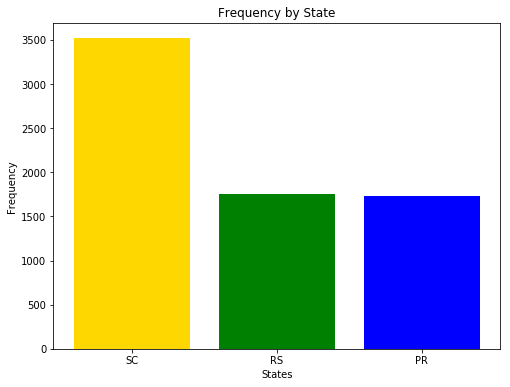

In [8]:
# frequencia por estado (graficamente)
labels = df.estado_residencia.value_counts().index
values = df.estado_residencia.value_counts()
colors = ["gold", "g", "blue"]

plt.figure(figsize = (8, 6))
plt.bar(labels, values, color = colors)
plt.title("Frequencia por Estado")
plt.xlabel("Estados")
plt.ylabel("Frequencia")
plt.show()

In [9]:
(df.groupby(["estado_residencia"]).mean())[["pontuacao_credito", "idade", "nivel_estabilidade", "saldo_conta", "numero_produtos"]]

,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos
estado_residencia,,,,,
PR,648.961294,39.492779,5.035817,119458.904945,1.522819
RS,651.105143,39.124000,5.007429,62169.610400,1.529714
SC,649.537653,38.482523,4.999147,62439.046206,1.525718


In [17]:
# Objetivo do desafio semanal
StatsByState = df.groupby(["estado_residencia"]).agg(["mean", "median", "std"]).pontuacao_credito
modeByState = df.groupby(["estado_residencia"]).pontuacao_credito.apply(lambda x: x.mode())

StatsByState["mode"] = modeByState.values
StatsByState = StatsByState[["mode", "median", "mean", "std"]] 
StatsByState.columns = ["moda", "mediana", "media", "desvio_padrao"]

In [18]:
# convertendo para json
StatsByState.to_json("./submission.json", orient="index")

## __FIM__